In [1]:
import torch

In [2]:
print(torch.cuda.is_available())

True


In [3]:
from tdc.single_pred import ADME

In [4]:
data_hia = ADME(name = 'HIA_Hou')

Found local copy...
Loading...
Done!


In [5]:
X, y = data_hia.get_data(format = 'DeepPurpose')

In [6]:
X

array(['CC(=O)Nc1ccccc1', 'CC(=O)Nc1nnc(S(N)(=O)=O)s1',
       'C=C1/C(=C\\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H](C)CCCC(C)C)C[C@H](O)C[C@H]1O',
       'Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C',
       'COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O',
       'CC(C)(C#N)c1cc(Cn2cncn2)cc(C(C)(C)C#N)c1',
       'COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2)cc1',
       'CN1CCN(CCCCN2C(=O)CN(/N=C/c3ccc(-c4ccc(Cl)cc4)o3)C2=O)CC1',
       'NS(=O)(=O)c1cc2c(cc1C(F)(F)F)N[C@H](Cc1ccccc1)NS2(=O)=O',
       'CC(=O)Nc1ccc(OC(=O)c2ccccc2OC(C)=O)cc1',
       'CC(C)COC[C@@H](CN1CCCC1)N(Cc1ccccc1)c1ccccc1',
       'CC(C)(Oc1ccc(CCNC(=O)c2ccccc2)cc1)C(=O)O',
       'O[C@](CCN1CCCCC1)(c1ccccc1)[C@@H]1C[C@H]2C=C[C@H]1C2',
       'CCN(CC)CCCOC(=O)[C@@]1(c2ccccc2)C[C@@H]2CC[C@@H]1C2',
       'CCC[C@@H]1O[C@@H]2C[C@@H]3[C@@H]4CCC5=CC(=O)C=C[C@]5(C)[C@@H]4[C@@H](O)C[C@]3(C)[C@]2(C(=O)CO)O1',
       'CN(C)C(=O)O[C@@H]1N=C(c2ccccc2)c2cc(Cl)ccc2N(C)C1=O',
       'NC(=O)N1c2ccccc2C=Cc2ccccc21', 'O=NN(CCCl)C(=O)NCCCl',


In [7]:
# !conda install -c conda-forge rdkit

In [8]:
# !pip install git+https://github.com/bp-kelley/descriptastorus 

In [9]:
# !pip install DeepPurpose

In [10]:
from DeepPurpose import utils, CompoundPred

In [11]:
train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = 'Transformer',
                                      random_seed = 'TDC')

Drug Property Prediction Mode...
in total: 578 drugs
encoding drug...
unique drugs: 578
Done.


In [12]:
train.head()

,SMILES,Label,drug_encoding
0,CC(=O)Nc1ccccc1,1,"([184, 201, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,"([184, 1000, 22, 763, 1049, 640, 0, 0, 0, 0, 0..."
2,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1,"([43, 955, 315, 150, 142, 643, 103, 1013, 525,..."
3,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,"([218, 343, 107, 71, 236, 567, 35, 265, 804, 0..."
4,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,1,"([271, 94, 452, 367, 1339, 1133, 458, 697, 579..."


In [13]:
config = utils.generate_config(drug_encoding = 'Transformer', 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 64)

In [14]:
model = CompoundPred.model_initialize(**config)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68632. Total time 0.00361 hours
Validation at Epoch 1 , AUROC: 0.38655 , AUPRC: 0.81524 , F1: 0.93577
Training at Epoch 2 iteration 0 with loss 0.34522. Total time 0.00388 hours
Validation at Epoch 2 , AUROC: 0.63305 , AUPRC: 0.92358 , F1: 0.93577
Training at Epoch 3 iteration 0 with loss 0.37397. Total time 0.00388 hours
Validation at Epoch 3 , AUROC: 0.64565 , AUPRC: 0.90218 , F1: 0.93577
Training at Epoch 4 iteration 0 with loss 0.50551. Total time 0.00416 hours
Validation at Epoch 4 , AUROC: 0.64145 , AUPRC: 0.89457 , F1: 0.93577
Training at Epoch 5 iteration 0 with loss 0.43429. Total time 0.00416 hours
Validation at Epoch 5 , AUROC: 0.66386 , AUPRC: 0.89767 , F1: 0.93577
Training at Epoch 6 iteration 0 with loss 0.50867. Total time 0.00444 hours
Validation at Epoch 6 , AUROC: 0.64425 , AUPRC: 0.89341 , F1: 0.93577
Training at Epoch 7 iteration 0 with loss 0.40879. Total t

Validation at Epoch 56 , AUROC: 0.45798 , AUPRC: 0.87170 , F1: 0.93577
Training at Epoch 57 iteration 0 with loss 0.47827. Total time 0.01194 hours
Validation at Epoch 57 , AUROC: 0.5 , AUPRC: 0.87931 , F1: 0.93577
Training at Epoch 58 iteration 0 with loss 0.40476. Total time 0.01194 hours
Validation at Epoch 58 , AUROC: 0.5 , AUPRC: 0.87931 , F1: 0.93577
Training at Epoch 59 iteration 0 with loss 0.36100. Total time 0.01222 hours
Validation at Epoch 59 , AUROC: 0.5 , AUPRC: 0.87931 , F1: 0.93577
Training at Epoch 60 iteration 0 with loss 0.40354. Total time 0.01222 hours
Validation at Epoch 60 , AUROC: 0.5 , AUPRC: 0.87931 , F1: 0.93577
Training at Epoch 61 iteration 0 with loss 0.43411. Total time 0.0125 hours
Validation at Epoch 61 , AUROC: 0.48739 , AUPRC: 0.87670 , F1: 0.93577
Training at Epoch 62 iteration 0 with loss 0.46414. Total time 0.0125 hours
Validation at Epoch 62 , AUROC: 0.50140 , AUPRC: 0.87960 , F1: 0.93577
Training at Epoch 63 iteration 0 with loss 0.49276. Total t

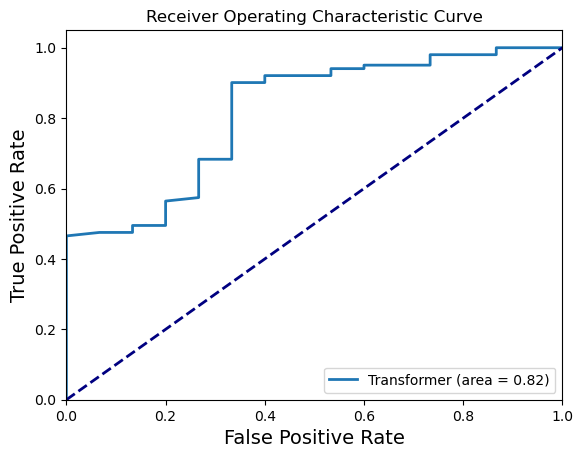

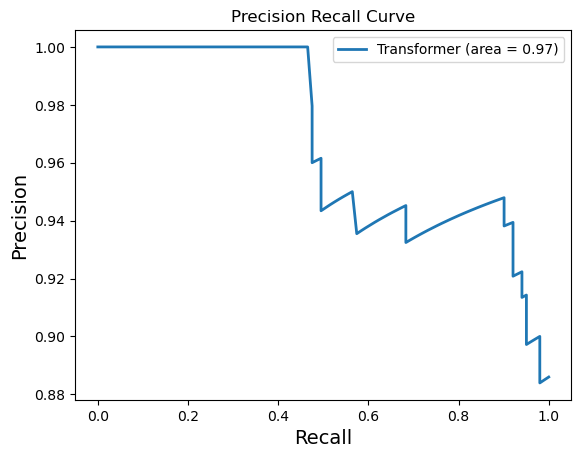

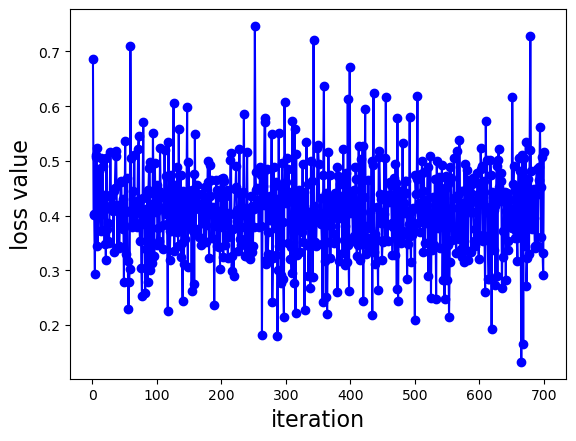

In [15]:
model.train(train, val, test)

In [16]:
_model_dir = './models'

In [17]:
!mkdir {_model_dir}

The system cannot find the path specified.
The syntax of the command is incorrect.


In [18]:
import os

In [ ]:
model.save_model(os.path.join(_model_dir, 'Transformer'))